In [12]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

In [1]:
import h2o
h2o.init()
from h2o.automl import H2OAutoML

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.211-b12, mixed mode)
  Starting server from c:\users\mikec\appdata\local\programs\python\python37\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\mikec\AppData\Local\Temp\tmpgizt2jth
  JVM stdout: C:\Users\mikec\AppData\Local\Temp\tmpgizt2jth\h2o_mikec_started_from_python.out
  JVM stderr: C:\Users\mikec\AppData\Local\Temp\tmpgizt2jth\h2o_mikec_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,03 secs
H2O cluster timezone:,Europe/Berlin
H2O data parsing timezone:,UTC
H2O cluster version:,3.24.0.5
H2O cluster version age:,1 month and 20 days
H2O cluster name:,H2O_from_python_mikec_66dqth
H2O cluster total nodes:,1
H2O cluster free memory:,1.752 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"


In [2]:
X_train = h2o.import_file('C:/Users/mikec/Codes/X_cnn1000.csv')
y_train = h2o.import_file('C:/Users/mikec/Codes/y_cnn1000.csv')
X_test = h2o.import_file('C:/Users/mikec/Codes/X_test1000.csv')
y_test = h2o.import_file('C:/Users/mikec/Codes/y_test1000.csv')

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [3]:
# preparing the train and test data sets
# now convert tweet vecs and labels to a pandas dataframe and back to h2o dataframe
train = X_train.cbind(y_train)
test = X_test.cbind(y_test)

In [4]:
# more on data prep
x = train.columns         # x: A list/vector of predictor column names or indexes. 
                          # This argument only needs to be specified if the user wants to exclude columns from the 
                          # set of predictors. If all columns (other than the response) should be used in prediction, 
                          # then this does not need to be set.

y = "labels"              # This argument is the name (or index) of the response column
x.remove(y)

# need to set train and test
train[y] = train[y].asfactor()
test[y] = test[y].asfactor()

In [5]:
# now the AUTO-ML piece comes in
aml = H2OAutoML(max_runtime_secs=1800) #max_models=10 or 20?, max_runtime_secs=3600
aml.train(x=x, y=y, training_frame=train)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [6]:
# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)

model_id,mean_per_class_error,logloss,rmse,mse
StackedEnsemble_AllModels_AutoML_20190808_125404,0.233441,0.549546,0.41852,0.175159
StackedEnsemble_BestOfFamily_AutoML_20190808_125404,0.243933,0.564599,0.426185,0.181634
GBM_1_AutoML_20190808_125404,0.249463,0.588824,0.441015,0.194494
GBM_3_AutoML_20190808_125404,0.250097,0.589596,0.440967,0.194452
GBM_2_AutoML_20190808_125404,0.250389,0.58861,0.440873,0.194369
GBM_4_AutoML_20190808_125404,0.25307,0.591973,0.441158,0.19462
GBM_grid_1_AutoML_20190808_125404_model_6,0.26018,0.966675,0.618539,0.38259
GBM_5_AutoML_20190808_125404,0.267432,0.636225,0.461523,0.213003
GBM_grid_1_AutoML_20190808_125404_model_4,0.268103,0.634123,0.461458,0.212944
GBM_grid_1_AutoML_20190808_125404_model_1,0.269222,0.846742,0.567502,0.322059


In [7]:
lb_pd = lb.as_data_frame()

In [8]:
# The leader model is stored here
aml.leader

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_AutoML_20190808_125404
No model summary for this model


ModelMetricsMultinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.15330284626646914
RMSE: 0.39153907374164987

ModelMetricsMultinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.17515900726294859
RMSE: 0.4185200201459287


In [9]:
preds = aml.predict(test)
print(preds)

stackedensemble prediction progress: |████████████████████████████████████| 100%



predict,p0,p1,p2
1,0.0739142,0.915766,0.0103202
1,0.0766083,0.918572,0.00481983
2,0.0402339,0.191123,0.768644
1,0.397201,0.588431,0.0143679
1,0.217413,0.774863,0.00772339
1,0.0355134,0.958696,0.0057904
1,0.0677874,0.927226,0.00498664
1,0.123526,0.868491,0.00798326
1,0.0420012,0.952241,0.0057577
1,0.0695893,0.923229,0.00718149


In [10]:
var = preds["predict"].cbind(test[y])
print(var)

predict,labels
1,1
1,1
2,2
1,1
1,1
1,1
1,1
1,1
1,1
1,1


              precision    recall  f1-score   support

           0       0.42      0.65      0.51       164
           1       0.96      0.90      0.93      1905
           2       0.82      0.91      0.86       410

    accuracy                           0.88      2479
   macro avg       0.73      0.82      0.77      2479
weighted avg       0.90      0.88      0.89      2479

[[ 106   46   12]
 [ 130 1707   68]
 [  18   20  372]]
0.881403791851553
0.8895983808835178


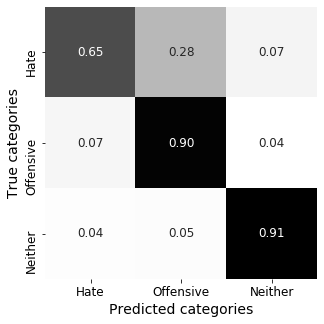

In [13]:
# convert to pandas dataframe
y_test = h2o.as_list(test[y], use_pandas=True)
y_pred = h2o.as_list(preds["predict"])
report = classification_report(y_test, y_pred)
print(report)
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.f1_score(y_test, y_pred, average='weighted'))

confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
matrix_proportions = np.zeros((3,3))
for i in range(0,3):
    matrix_proportions[i,:] = confusion_matrix[i,:]/float(confusion_matrix[i,:].sum())
names=['Hate','Offensive','Neither']
confusion_df = pd.DataFrame(matrix_proportions, index=names,columns=names)
plt.figure(figsize=(5,5))
seaborn.heatmap(confusion_df,annot=True,annot_kws={"size": 12},cmap='gist_gray_r',cbar=False, square=True,fmt='.2f')
plt.ylabel(r'True categories',fontsize=14)
plt.xlabel(r'Predicted categories',fontsize=14)
plt.tick_params(labelsize=12)
plt.savefig('C:/Users/mikec/Documents/Results/Univariate1000CondensedMax05.png')

f = open("C:/Users/mikec/Documents/Results/Univariate1000CondensedMax05.txt", "a")
print("Univariate feature selection with 1000 features with condensed nearest neighborhood, max run time 30 mins", file=f)
print(report, file=f)
print(metrics.confusion_matrix(y_test, y_pred), file=f)
print(metrics.accuracy_score(y_test, y_pred), file=f)
print(metrics.f1_score(y_test, y_pred, average='weighted'), file=f)
f.close()

In [14]:
file = lb_pd.to_csv('C:/Users/mikec/Documents/Results/Univariate1000CondensedMax05.csv')
#featuresSelected = uni_selected_feat.to_csv('C:/Users/mikec/Documents/Results/feature_selection.csv')